# Esempio di EDA completo
Proviamo a fare un esercizio di exploratory data analysis utilizzando il dataset titanic contenuto in seaborn.

Il dataset contiene informazioni sui passeggeri del titanic e un campo che dice se il passeggero è sopravvissuto o meno.

Questo dataset viene principalmente utilizzato per predire se un passeggero è sopravvissuto o meno sulla base delle informazioni (sesso, classe, età, etc.).

Possiamo cercare di fare questa operazione sulla base delle informazioni a disposizione.

Iniziamo caricando i dati


In [41]:
import seaborn as sns
sns.set_theme()

df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


Le colonne che abbiamo sono:
*	Survived: valore numerico che indica se il passeggero è sopravvissuto o meno;
*	Pclass: classe del passeggero;
*	Sex: sesso del passeggero;
*	Age: età del passeggero;
*	Sibsp: numero di fratelli/sorelle a bordo;
*	Parch: numero di genitori/figli a bordo;
*	Fare: quanto il passeggero ha pagato per il biglietto, in sterline;
*	Embarked: porto da cui si è imbarcato;
*	Who: indica se è un uomo, una donna o un bambino;
*	Adult_male: campo booleano che indica se è un uomo adulto o meno;
*	Deck: ponte in cui si trovava il passeggero;
*	Embark_town: città in cui si è imbarcato, corrisponde a embarked;
*	Alive: sopravvissuto o meno (ripetizione di Survived);
*	Alone: campo booleano che indica se il passeggero era da solo o meno.


Potremmo iniziare analizzando la distribuzione dei campi numerici


In [42]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Possiamo vedere per `fare` che la media 32.2 è molto maggiore della mediana 14.45, quindi abbiamo una asimmetria positiva.

Vuol dire che abbiamo una coda più lunga a destra, cioè ci sono valori alti (outliers) che spostano la media verso destra.

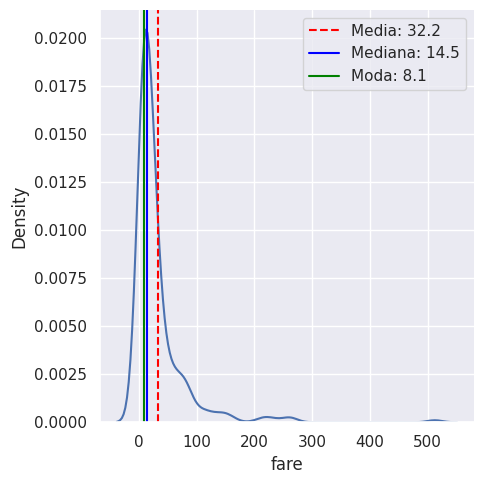

In [43]:
import matplotlib.pyplot as plt

# Crea la distribuzione
fig = sns.displot(df['fare'], kind='kde')

# Calcola media e mediana
media = df['fare'].mean()
mediana = df['fare'].median()
moda = df['fare'].mode()[0]

# Aggiungi le linee alla Axes (essendo un FacetGrid, accedi con fig.ax o fig.axes[0])
for ax in fig.axes.flat:
    ax.axvline(media, color='red', linestyle='--', label=f'Media: {media:.1f}')
    ax.axvline(mediana, color='blue', linestyle='-', label=f'Mediana: {mediana:.1f}')
    ax.axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.1f}')
    ax.legend()

plt.show()

Possiamo vederlo anche dal coefficiente di Pearson che essendo maggiore di 1 indica una forte asimmetria

In [44]:
print(3*(media-mediana)/df['fare'].std())

1.0715707369956913


Possiamo usare anche il coefficiente di asimmetria calcolato da Pandas.

Utilizza un coefficiente chiamato Fisher-Pearson normalizzato. Si può interpretare come:

Segno:
* ≈ 0 → simmetrica
* \> 0 → asimmetrica a destra (positiva)
* < 0 → asimmetrica a sinistra (negativa)

* 0	Distribuzione simmetrica
* 0.1 – 0.5	Asimmetria leggera
* 0.5 – 1.0	Asimmetria moderata
* ±1.0	Asimmetria forte (rilevante)

In [45]:
df.skew(numeric_only=True)

,0
survived,0.478523
pclass,-0.630548
age,0.389108
sibsp,3.695352
parch,2.749117
fare,4.787317
adult_male,-0.420431
alone,-0.420431


Possiamo poi analizzare se sono presenti o meno valori nulli.

In [46]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Possiamo vederlo anche in percentuale

In [47]:
df.isna().sum()/len(df)*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


Siccome deck presenta molti valori nulli non è utilizzabile e quindi lo eliminiamo.

In [48]:
df.drop('deck', axis=1, inplace=True)

Essendo solo 2 le righe in cui manca il luogo d’imbarco, le possiamo eliminare senza avere una perdita significativa dei dati.

In [49]:
df.dropna(subset=['embarked', 'embark_town'], inplace=True)

Le età mancanti possono essere rimpiazzate con la mediana, essendo la distribuzione spostata a destra (right skew) è più robusta agli outliers.

In [50]:
df.loc[df['age'].isna(), 'age'] = df['age'].median()

Possiamo quindi creare un grafico che mostra la distribuzione dei passeggeri per età con media e mediana.

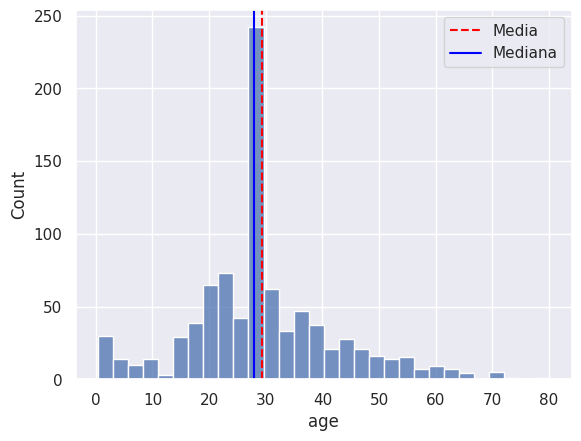

In [51]:
ax = sns.histplot(data=df, x='age')
ax.axvline(df['age'].mean(), color='red', linestyle='--', label='Media')
ax.axvline(df['age'].median(), color='blue', linestyle='-', label='Mediana')
ax.legend()
plt.show()

Come si vede abbiamo i dati leggermente sbilanciati verso destra e avendo fatto la sostituzione con la moda, vediamo che l’età più frequente è 28.

Ora possiamo iniziale ad analizzare il tasso di sopravvivenza rispetto alle varie metriche.
Iniziamo vedendo quanti passeggeri sono sopravvissuti in percentuale sul totale, possiamo vedere che circa il 40% è sopravvissuto.

<Axes: xlabel='survived', ylabel='percent'>

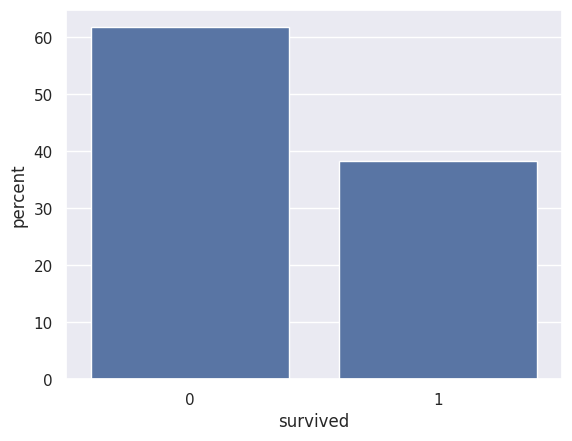

In [52]:
sns.countplot(data=df, x='survived', stat='percent')

Possiamo vedere come erano distribuiti i passeggeri per sesso, si può vedere come circa il 65% fossero uomini e il 35% donne.


<Axes: xlabel='sex', ylabel='percent'>

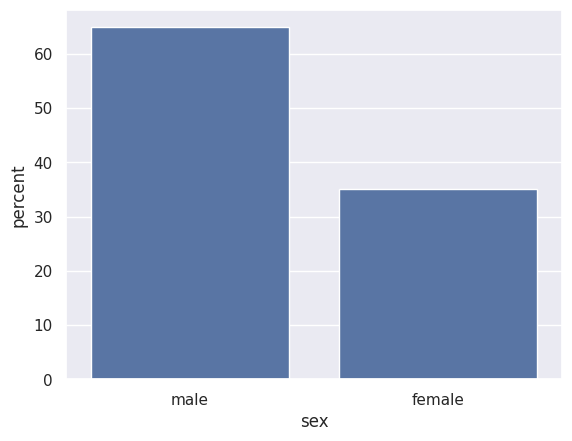

In [53]:
sns.countplot(data=df, x='sex', stat='percent')

Ora possiamo vedere qual è la percentuale di sopravvissuti rispetto al totale degli uomini e rispetto al totale delle donne.
Calcoliamo quindi per ogni gruppo queste percentuali e poi le visualizziamo in un grafico a barre

<Axes: xlabel='sex'>

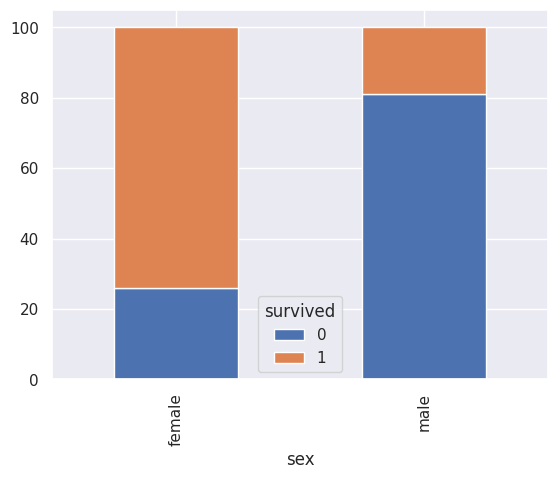

In [55]:
import pandas as pd

perc = pd.crosstab(df['sex'], df['survived'], normalize='index')*100
perc.plot.bar(stacked=True)

Come si può vedere più del 70% delle donne è sopravvissuto, mentre l’80% degli uomini è deceduto, quindi una donna aveva molte più possibilità di salvarsi rispetto ad un uomo.

Possiamo fare la stessa analisi anche per classe, possiamo vedere che più la classe è alta più un passeggero ha probabilità di sopravvivere.

<Axes: xlabel='class'>

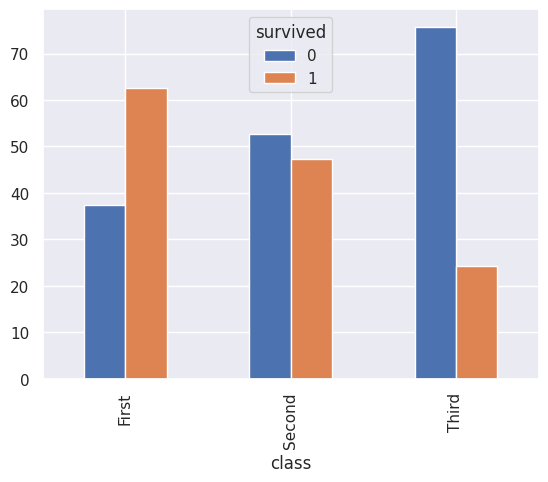

In [56]:
perc = pd.crosstab(df['class'], df['survived'], normalize='index')*100
perc.plot.bar()

Ora possiamo anche fare un’analisi sull’età per vedere se è vera la regola “salvate prima donne e bambini”.

Possiamo iniziare studiando la distribuzione dei sopravvissuti per età, come si può vedere tra i deceduti ci sono anche diversi bambini, quindi non sembra sia propriamente rispettata.

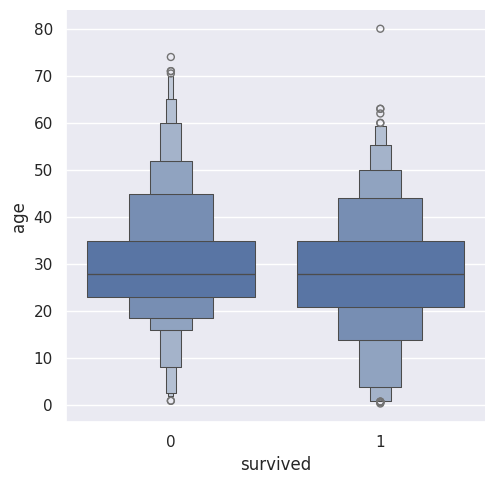

In [57]:
sns.catplot(data=df, x='survived', y='age', kind='boxen')

Avendo a disposizione il campo who che differenzia uomini, donne e bambini proviamo a vedere com’è la percentuale di sopravvissuti e deceduti rispetto a questo campo.

<Axes: xlabel='who'>

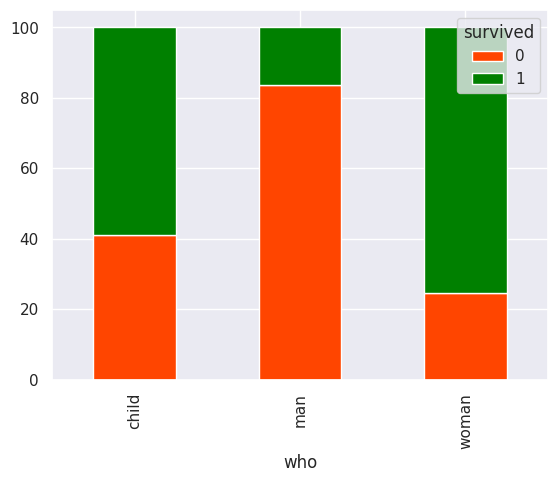

In [58]:
perc = pd.crosstab(df['who'], df['survived'], normalize='index')*100
perc.plot.bar(stacked=True, color=['orangered', 'green'])

Possiamo vedere che si sono salvati più bambini e donne rispetto agli uomini, però il 40% dei bambini è deceduto, quindi non sembra propriamente vero che i bambini vengono messi in salvo prima degli altri.

Ora possiamo fare un’analisi per classe e sesso, quindi combinando i due campi.
Possiamo vedere i valori in una heatmap per esempio

<Axes: xlabel='sex-survived', ylabel='pclass'>

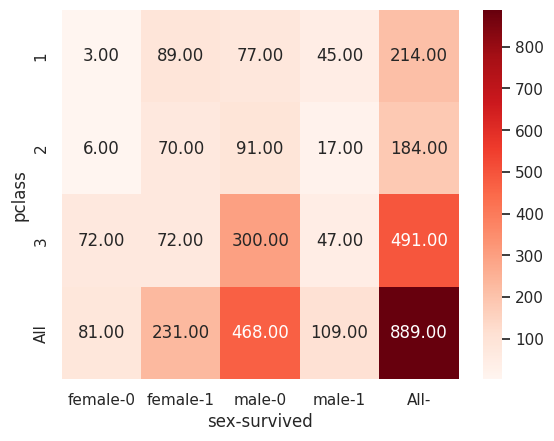

In [71]:
data = pd.crosstab(df.pclass, [df.sex, df.survived], margins=True)
sns.heatmap(data, annot=True, fmt='.2f', cmap='Reds')

Possiamo vedere come in prima e seconda classe siano sopravvissute quasi tutte le donne, mentre nella terza classe solo il 50%.

Quindi una donna di prima classe aveva quasi la sicurezza di sopravvivere, rispetto alle donne di un’altra classe. Diciamo che si avevano più chance di sopravvivere se si era in una classe più alta.

Anche se guardiamo l’età (bambino, donna adulta, uomo adulto) possiamo notare che il tasso di sopravvivenza dipende di più dalla classe piuttosto che dall’età, in terza classe sono morti il 56% dei bambini! Si può dire che piuttosto che salvare prima donne e bambini, vennero salvati prima i passeggeri di classe più alta (soprattutto donne e bambini in questo caso).

<Axes: xlabel='who-survived', ylabel='pclass'>

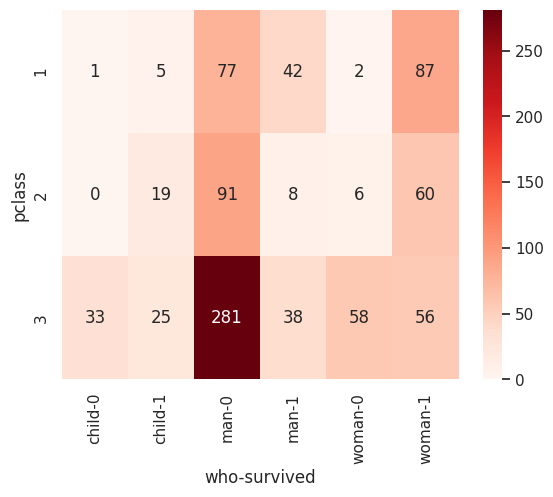

In [62]:
data = pd.crosstab(df.pclass, [df.who, df.survived])
sns.heatmap(data, annot=True, fmt='d', cmap='Reds')

Possiamo verificarlo anche mostrando un violin plot il biglietto pagato dai passeggeri sulla base se sono sopravvissuti o meno

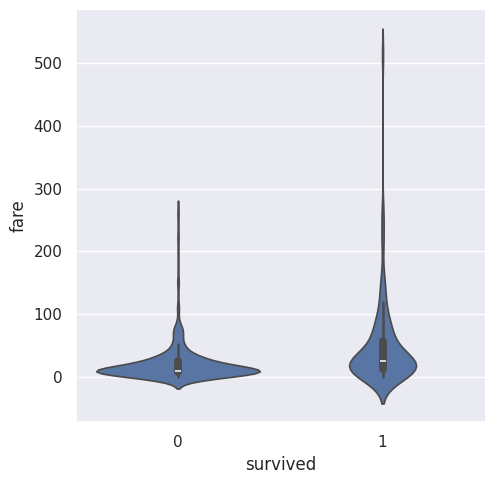

In [72]:
sns.catplot(data=df, x='survived', y='fare', kind='violin')

Si può notare che ci sono molti più morti dove la tariffa è bassa e molti più sopravvissuti dove la tariffa è più alta, si vede anche (linea bianca) che la mediana dei sopravvissuti è più alta rispetto a quella dei deceduti.



Concludiamo guardando la correlazione tra le varie variabili. La correlazione può essere calcolata solo su variabili numeriche, quindi dobbiamo prima o eliminare quelle che non ci interessano o convertire quelle che ci interessano in valori numerici.

In [73]:
df1 = df.copy()
df1.drop(['class', 'who', 'class', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)
df1['sex'] = pd.factorize(df1['sex'])[0]
df1['embarked'] = pd.factorize(df1['embarked'])[0]

Possiamo anche aggregare delle variabili, per esempio il numero di fratelli/sorelle o coniugi a bordi e il numero di genitori/figli può essere aggregato creando una nuova variabile family_size calcolata come sibsp+parch+1 (il +1 serve per includere il passeggero stesso)


In [74]:
df1['family_size'] = df1['sibsp'] + df1['parch'] + 1
df1.drop(['sibsp', 'parch'], axis=1, inplace=True)

<Axes: >

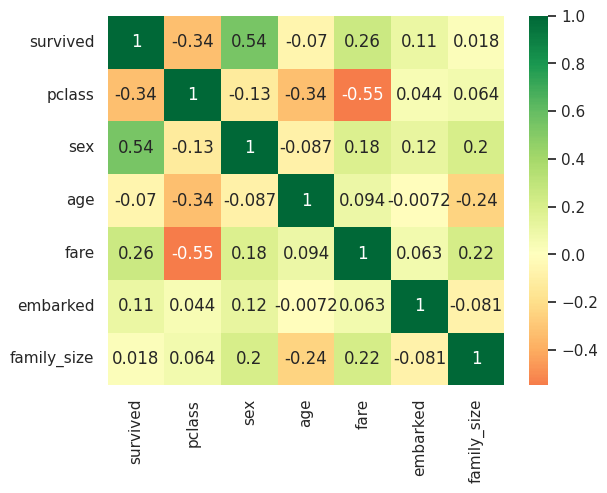

In [78]:
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn', center=0)

Dalla correlazione possiamo vedere quello che avevamo scoperto tramite l’analisi grafica dei dati:
*	C’è una correlazione negativa tra i passeggeri sopravvissuti e la classe, quindi più la classe è alta (il valore è basso) più aumenta la possibilità di sopravvivenza;
*	C’è una correlazione positiva con il sesso (0-> maschio, 1-> femmina): le donne hanno più possibilità di sopravvivere degli uomini;
*	L’età non influisce molto, la correlazione è molto vicina allo zero;
*	Il prezzo del biglietto ha un’influenza positiva: chi pagava di più aveva più probabilità di sopravvivere;
*	Il luogo d’imbarco non influisce molto;
*	La dimensione della famiglia non influisce, quindi se si viaggiava da soli o in gruppo le chance di sopravvivere non cambiavano significativamente.
